In [4]:
library(DropletUtils)
library(scds)
library(feather)
library(Matrix)
library(SoupX)
library(data.table)
library(Seurat)

In [6]:
dataDirs1 = c("/slow/Jing/Penuts_cellranger_snRNA_results_b2/matrix/putamen_3N")

In [7]:
toc = Seurat::Read10X(file.path(dataDirs1, "filtered_feature_bc_matrix", "soupx_data"))
tod = Seurat::Read10X(file.path(dataDirs1, "raw_feature_bc_matrix", "soupx_data"))
#sc = SoupChannel(tod, toc)

In [8]:
sc1 = SoupChannel(tod, toc, calcSoupProfile = FALSE)
sc1 = estimateSoup(sc1)

In [9]:
sc1

Channel with 54894 genes and 11403 cells



In [10]:
str(sc1)

List of 4
 $ toc        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:39180388] 76 99 111 171 195 221 225 237 245 254 ...
  .. ..@ p       : int [1:11404] 0 2152 6110 8867 10630 15264 18437 24465 26539 29248 ...
  .. ..@ Dim     : int [1:2] 54894 11403
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. ..$ : chr [1:11403] "AAACCCAAGAGCCATG-1" "AAACCCAAGCCTCATA-1" "AAACCCAAGCCTGTGC-1" "AAACCCAAGGGAGATA-1" ...
  .. ..@ x       : num [1:39180388] 1 1 2 1 2 2 2 2 1 1 ...
  .. ..@ factors : list()
 $ metaData   :'data.frame':	11403 obs. of  1 variable:
  ..$ nUMIs: num [1:11403] 3787 10395 5567 2692 15426 ...
 $ nDropUMIs  : Named num [1:6794880] 0 1 3 0 0 1 0 2 2 0 ...
  ..- attr(*, "names")= chr [1:6794880] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
 $ soupProfile:'data.frame':	54894 obs. of  2 variables:
  ..$ est   : num [1:54894] 0 0 0 0 0 .

In [11]:
#set PBMC_DR
set.seed(1)

In [12]:
srat = CreateSeuratObject(sc1$toc)

In [13]:
srat = NormalizeData(srat)

In [14]:
srat = ScaleData(srat)

Centering and scaling data matrix



In [15]:
#srat = FindVariableGenes(srat)
srat = FindVariableFeatures(srat)

In [16]:
srat = RunPCA(srat,pcs.compute=30)

PC_ 1 
Positive:  RYR2, CACNA2D3, DLGAP2, PTPRN2, RYR3, SLC35F3, MYT1L, ADCY5, PDZD2, SLIT3 
	   INPP5A, OPCML, PDE1B, DGKI, CACNA1E, CACNA1C, GALNT17, ABLIM2, CNTNAP2, CELF5 
	   ACTN1, DPP6, BCL11B, RBFOX3, GRIA3, PTPN5, CAMK1D, ZNF385B, ATP2B1, NGEF 
Negative:  SLC1A2, NFIA, SLC1A3, ADGRV1, NEAT1, C1orf61, DAAM2, LUZP2, PDZRN4, GPM6A 
	   PREX2, SPARCL1, ACACB, ALDH1A1, PRKCA, ACSBG1, TCF4, C1orf21, ATP13A4, CABLES1 
	   NHSL1, SLC25A18, ETNPPL, ATP1A2, LINC00499, LRIG1, PRKG1, FBXL7, MFGE8, PRDM16 
PC_ 2 
Positive:  SORCS2, MMD2, PITPNC1, AC011246.1, CABLES1, RGS20, RFX4, DGKG, SLC25A18, OLFM2 
	   PRDM16, NTRK2, LINC00499, CARMIL1, ACSBG1, COL5A3, SFXN5, PRR5, MFGE8, ATP13A4 
	   GPAM, FRMD4A, EYA2, ABLIM1, ALDH1A1, SHROOM3, GLI3, SHISA6, CAMK2G, C1orf61 
Negative:  MBP, ST18, DOCK10, RNF220, C10orf90, PLCL1, GARNL3, ZNF536, ENPP2, MOBP 
	   AL359091.1, NKAIN2, PEX5L, PIP4K2A, PDE8A, CREB5, AJ009632.2, ST6GALNAC3, CLMN, ZEB2 
	   MOG, KIF13B, CNDP1, SHROOM4, FA2H, HAPLN2, PLEKHH1,

In [17]:
srat = RunTSNE(srat,dims.use=seq(30))

In [18]:
srat <- FindNeighbors(srat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [19]:
srat = FindClusters(srat, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11403
Number of edges: 477369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9268
Number of communities: 19
Elapsed time: 6 seconds


In [20]:
str(srat)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:39180388] 76 99 111 171 195 221 225 237 245 254 ...
  .. .. .. .. .. ..@ p       : int [1:11404] 0 2152 6110 8867 10630 15264 18437 24465 26539 29248 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 54894 11403
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. .. .. .. .. ..$ : chr [1:11403] "AAACCCAAGAGCCATG-1" "AAACCCAAGCCTCATA-1" "AAACCCAAGCCTGTGC-1" "AAACCCAAGGGAGATA-1" ...
  .. .. .. .. .. ..@ x       : num [1:39180388] 1 1 2 1 2 2 2 2 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:39180388] 76 99 111 171 19

In [21]:
PBMC_DR = as.data.frame(srat$tsne@cell.embeddings)

In [22]:
colnames(PBMC_DR) = c('RD1','RD2')

In [23]:
str(PBMC_DR)

'data.frame':	11403 obs. of  2 variables:
 $ RD1: num  -42.99 -5.54 -9.28 -44.49 38.85 ...
 $ RD2: num  2.337 -24.058 0.482 4.137 21.93 ...


In [24]:
PBMC_DR$Cluster = factor(srat@meta.data[rownames(PBMC_DR),'RNA_snn_res.0.5'])

In [25]:
str(srat@meta.data)

'data.frame':	11403 obs. of  5 variables:
 $ orig.ident     : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA     : num  3787 10395 5567 2692 15426 ...
 $ nFeature_RNA   : int  2152 3958 2757 1763 4634 3173 6028 2074 2709 3220 ...
 $ RNA_snn_res.0.5: Factor w/ 19 levels "0","1","2","3",..: 19 2 1 9 11 3 12 1 1 2 ...
 $ seurat_clusters: Factor w/ 19 levels "0","1","2","3",..: 19 2 1 9 11 3 12 1 1 2 ...


In [23]:
getwd()

[1] "/home/stauffer/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx"

In [24]:
#saveRDS(PBMC_DR, file = "~/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx/putamen_3_DR.rds")

In [26]:
#PBMC_DR <- readRDS("putamen_3_DR.rds")

In [27]:
str(PBMC_DR)

'data.frame':	11403 obs. of  3 variables:
 $ RD1    : num  -42.99 -5.54 -9.28 -44.49 38.85 ...
 $ RD2    : num  2.337 -24.058 0.482 4.137 21.93 ...
 $ Cluster: Factor w/ 19 levels "0","1","2","3",..: 19 2 1 9 11 3 12 1 1 2 ...


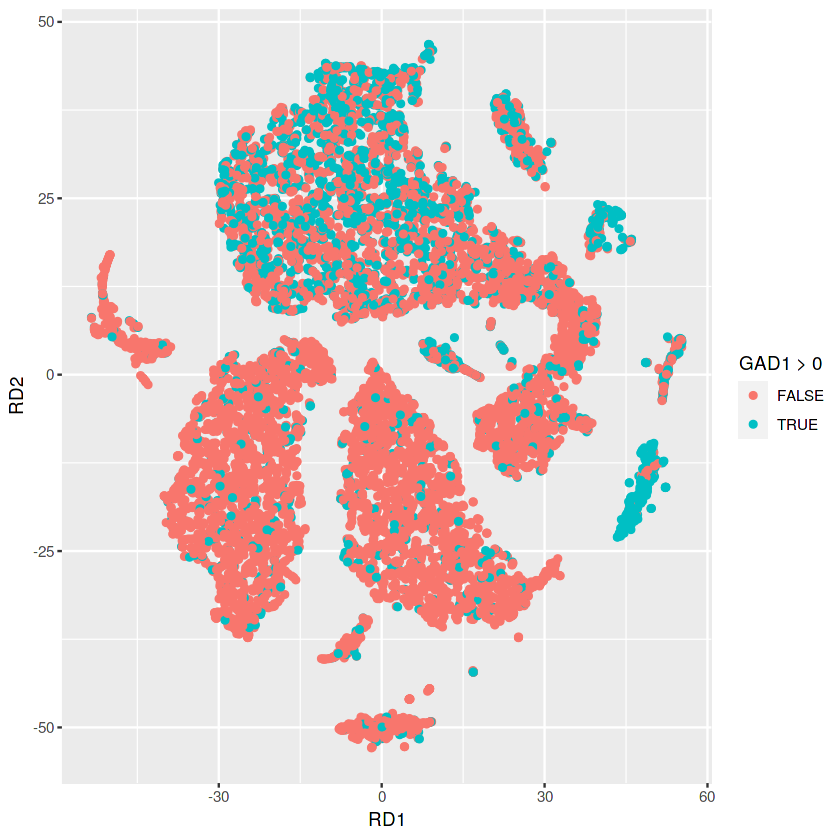

In [28]:
library(ggplot2)
PBMC_DR$GAD1 = sc1$toc["GAD1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD1 > 0))
plot(gg)

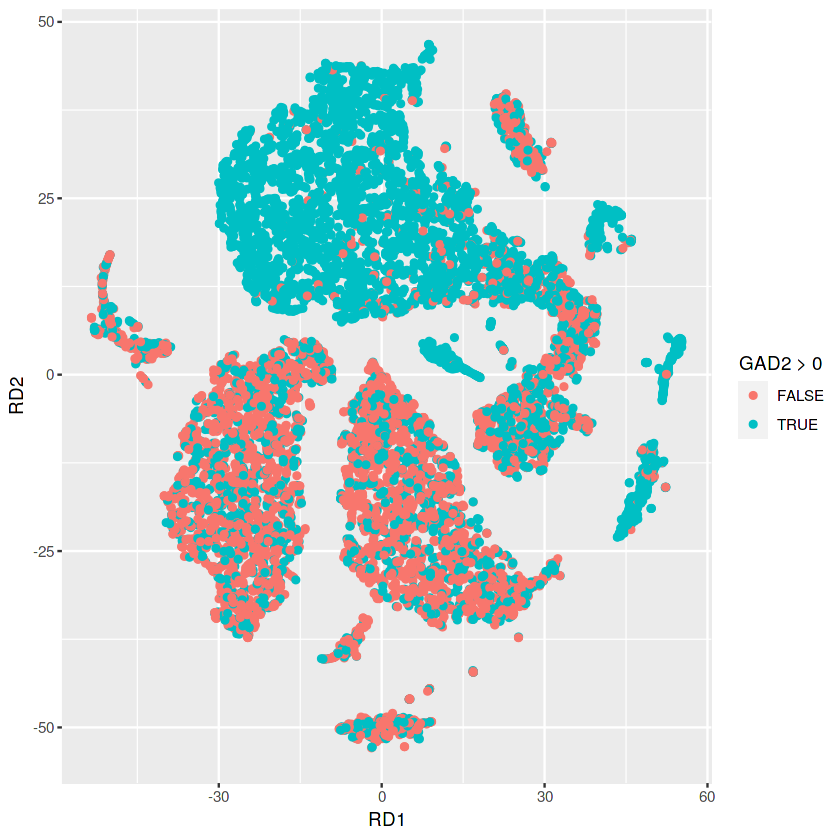

In [29]:
library(ggplot2)
PBMC_DR$GAD2 = sc1$toc["GAD2", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD2 > 0))
plot(gg)

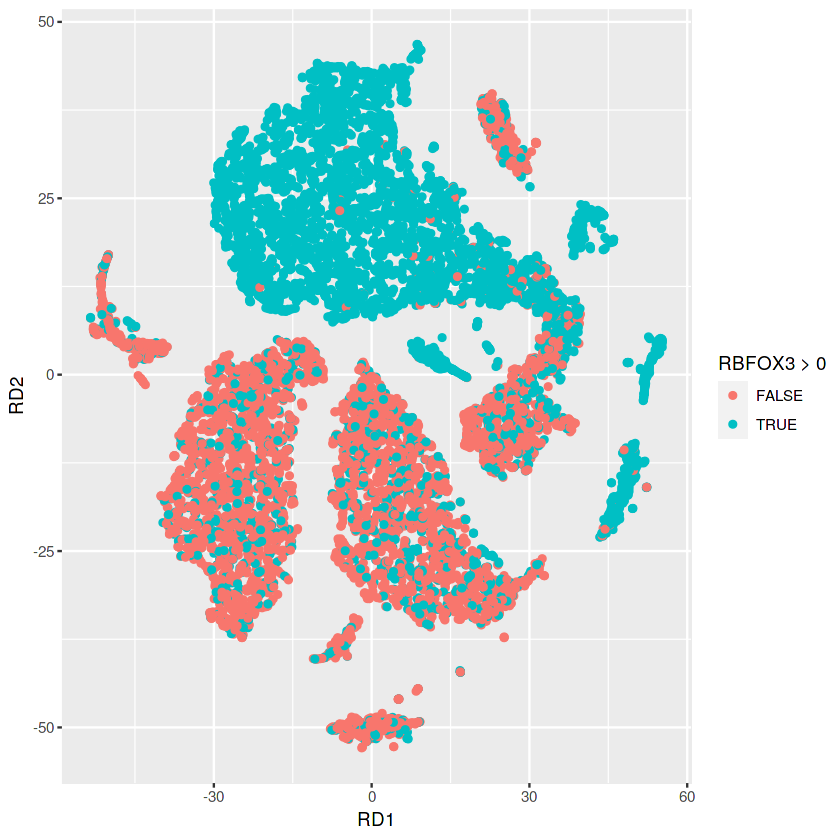

In [30]:
library(ggplot2)
PBMC_DR$RBFOX3 = sc1$toc["RBFOX3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = RBFOX3 > 0))
plot(gg)

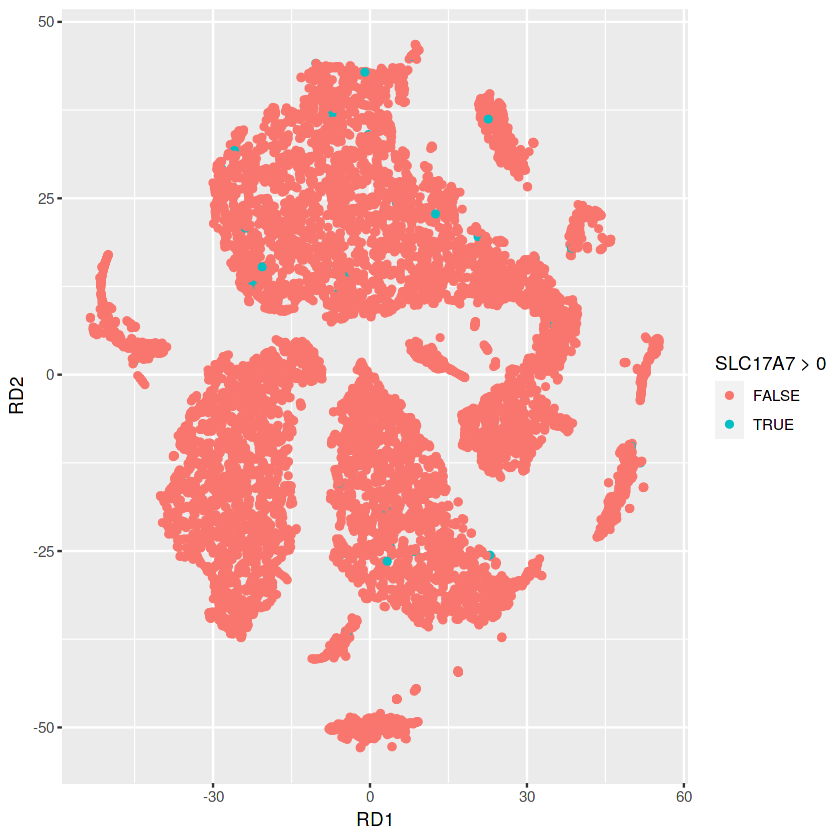

In [31]:
library(ggplot2)
PBMC_DR$SLC17A7 = sc1$toc["SLC17A7", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = SLC17A7 > 0))
plot(gg)

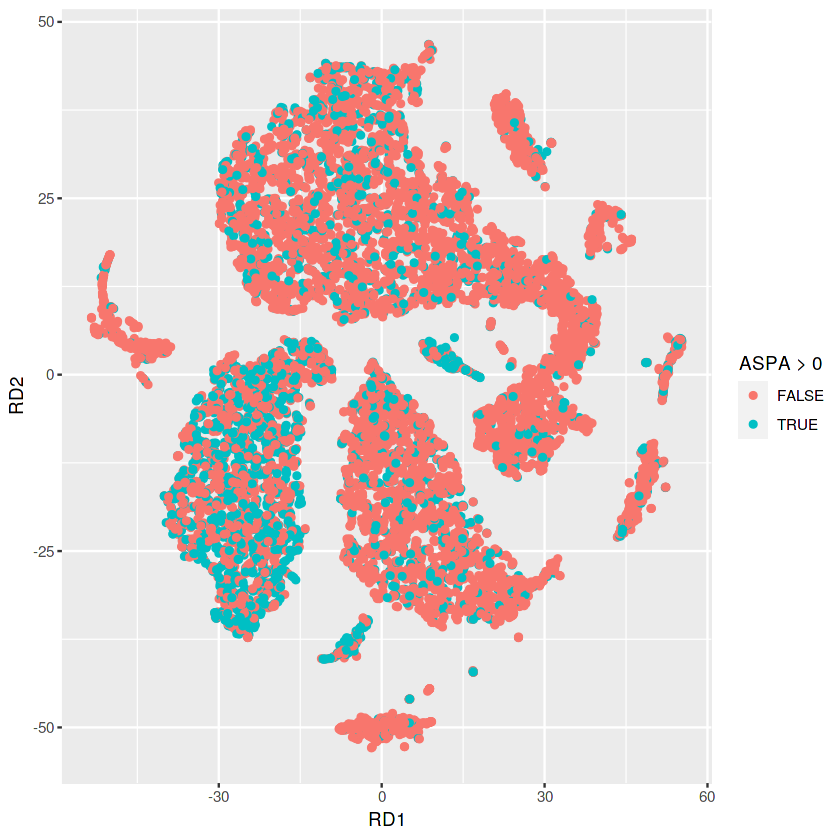

In [32]:
library(ggplot2)
PBMC_DR$ASPA = sc1$toc["ASPA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ASPA > 0))
plot(gg)

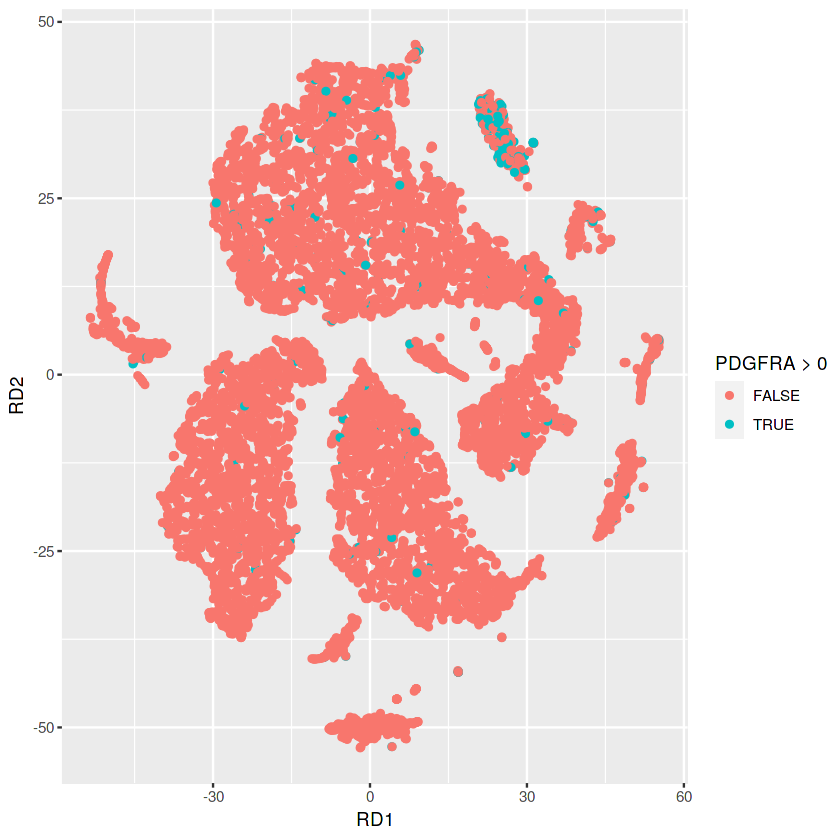

In [33]:
library(ggplot2)
PBMC_DR$PDGFRA = sc1$toc["PDGFRA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = PDGFRA > 0))
plot(gg)

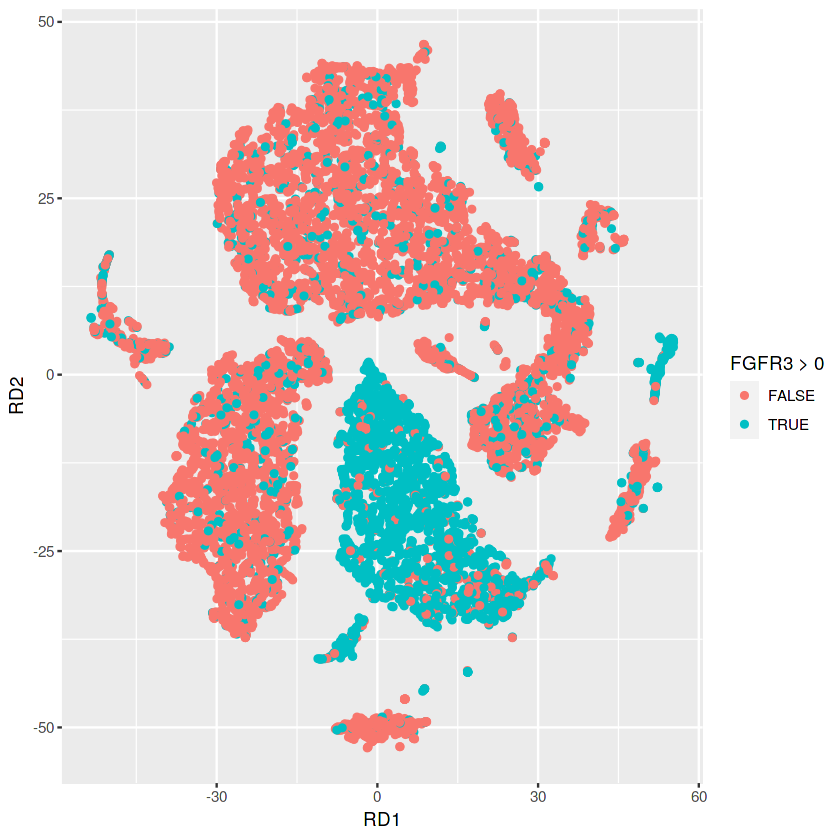

In [34]:
library(ggplot2)
PBMC_DR$FGFR3 = sc1$toc["FGFR3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = FGFR3 > 0))
plot(gg)

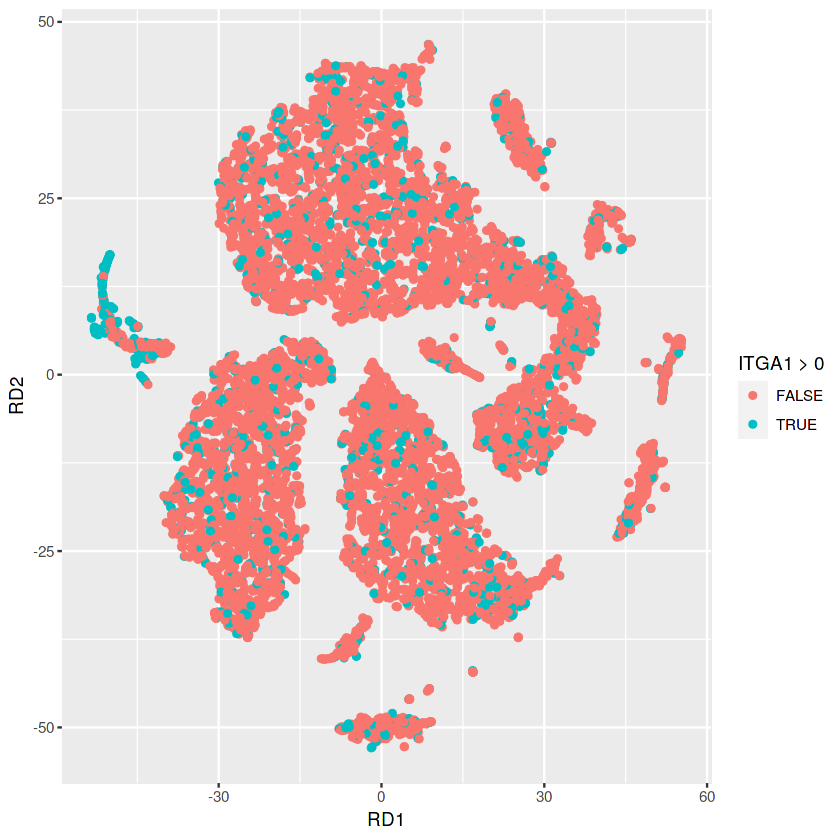

In [35]:
library(ggplot2)
PBMC_DR$ITGA1 = sc1$toc["ITGA1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ITGA1 > 0))
plot(gg)

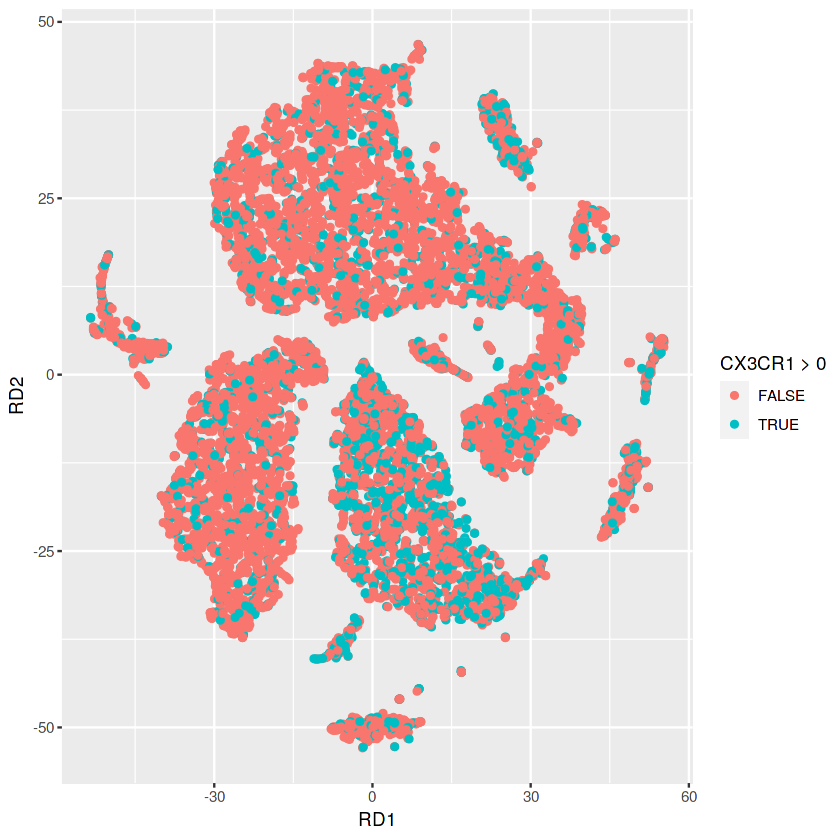

In [36]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["GFAP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

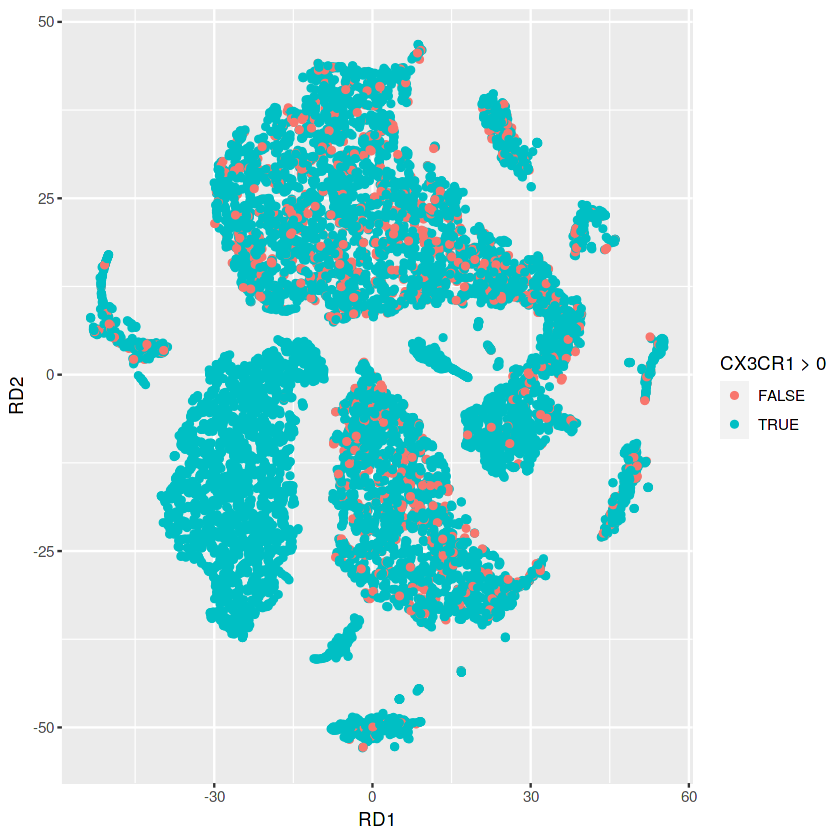

In [37]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["MBP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

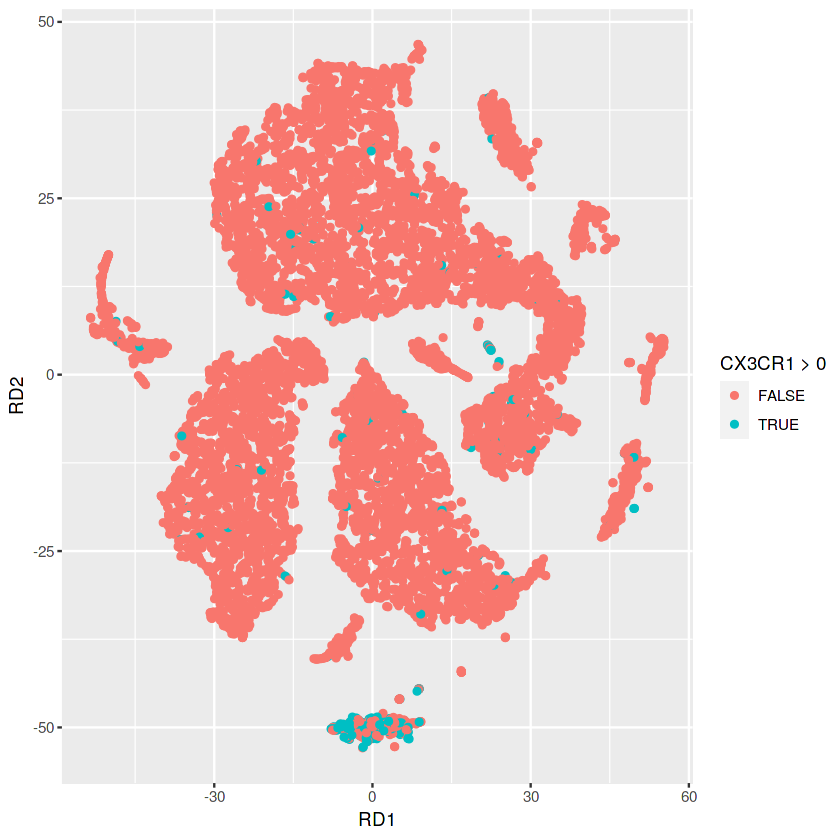

In [38]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["CX3CR1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

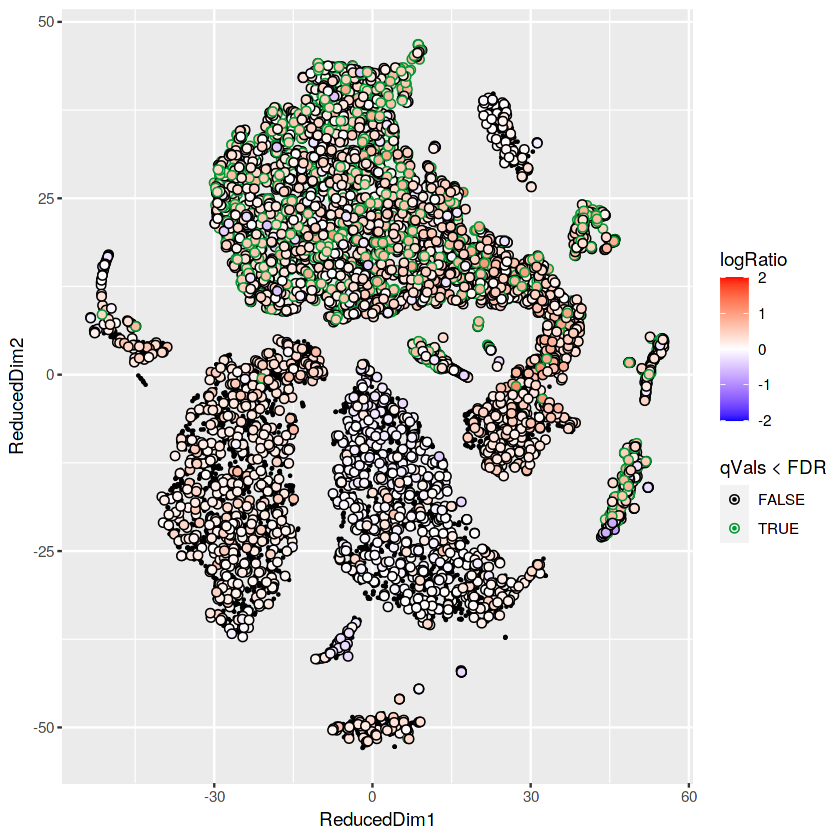

In [39]:
gg = plotMarkerMap(sc1, "RBFOX3", PBMC_DR)
plot(gg)

In [40]:
sc1 = setDR(sc1, PBMC_DR)

Warning message in setDR(sc1, PBMC_DR):
“DR has 12 columns where 2 were expected.  Using first two.”


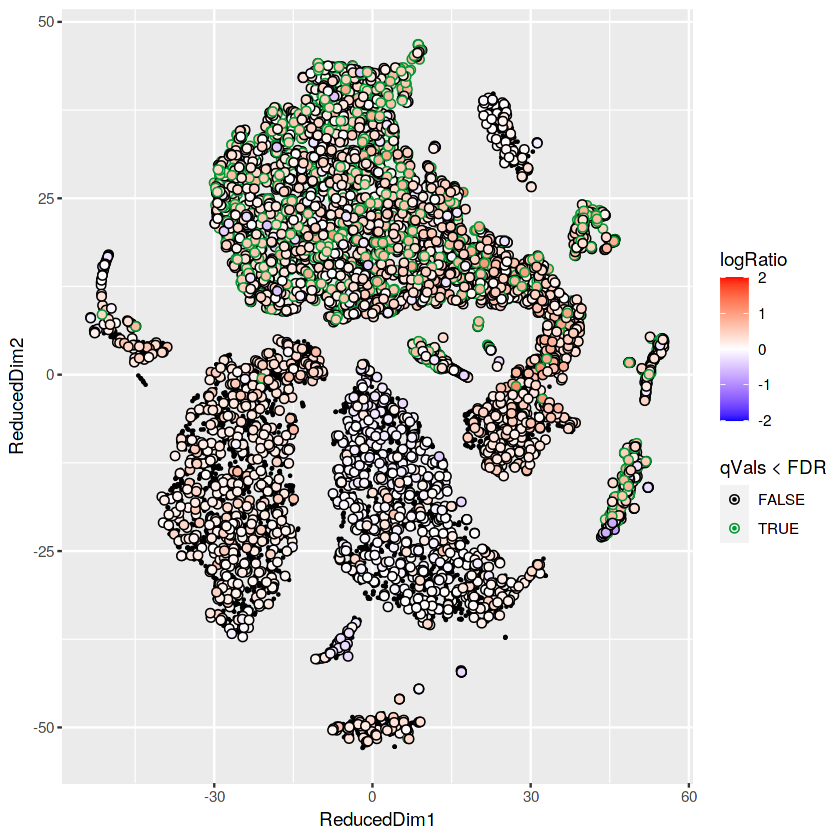

In [41]:
gg = plotMarkerMap(sc1, "RBFOX3")
plot(gg)

In [42]:
sc1 = setContaminationFraction(sc1, 0.2)

In [43]:
head(sc1$soupProfile[order(sc1$soupProfile$est, decreasing = TRUE), ], n = 20)

est         counts
MALAT1     0.040488104 498233
RBFOX1     0.008494300 104528
AC120193.1 0.007987704  98294
PHACTR1    0.007461686  91821
PCDH9      0.005765963  70954
GPC5       0.004704988  57898
NRXN3      0.004641115  57112
DGKB       0.004602921  56642
ROBO2      0.004383672  53944
PDE10A     0.003788256  46617
CADM2      0.003632392  44699
PLCB1      0.003367717  41442
ANKS1B     0.003056072  37607
DLG2       0.003043883  37457
SNHG14     0.002978791  36656
ADGRB3     0.002889401  35556
NRXN1      0.002763118  34002
FGF14      0.002583851  31796
NLGN1      0.002541756  31278
CSMD1      0.002516483  30967

In [44]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

No gene lists provided, attempting to find and plot cluster marker genes.

Found 2571 marker genes

Warning message:
“Removed 163528 rows containing non-finite values (stat_ydensity).”


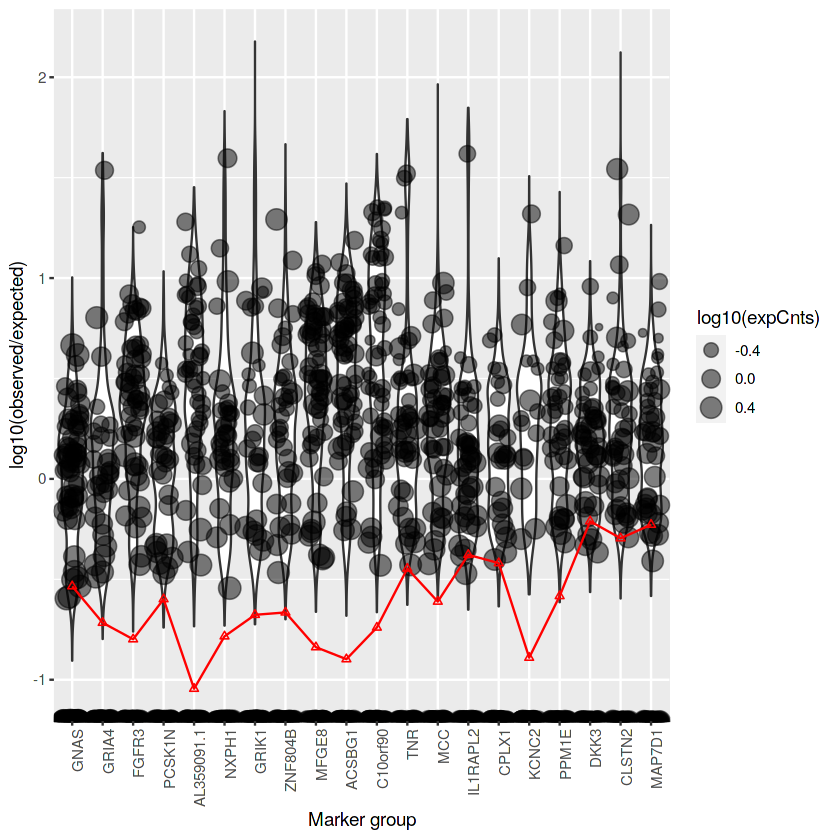

In [45]:
plotMarkerDistribution(sc1)

In [48]:
#str(sc1)

In [49]:
#sc1 = inferNonExpressedGenes(sc1)
##Error in inferNonExpressedGenes(sc1): could not find function "inferNonExpressedGenes"
##Traceback:

In [50]:
igGenes = c("GNAS", "GRIA4","FGFR3","PCSK1N","AL359091.1","NXPH1","GRIK1","ZNF804B","MFGE8","ACSBG1","C10orf90","TNR","MCC","IL1RAPL2","CPLX1","KCNC2","PPM1E","DKK3","CLSTN2","MAP7D1")



In [51]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes))

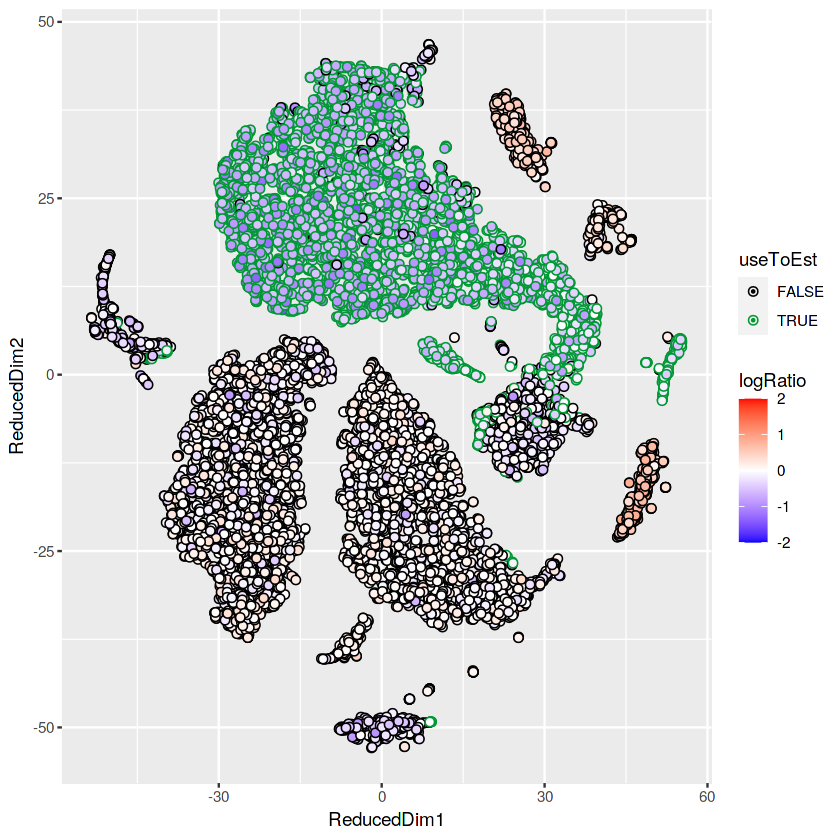

In [52]:
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

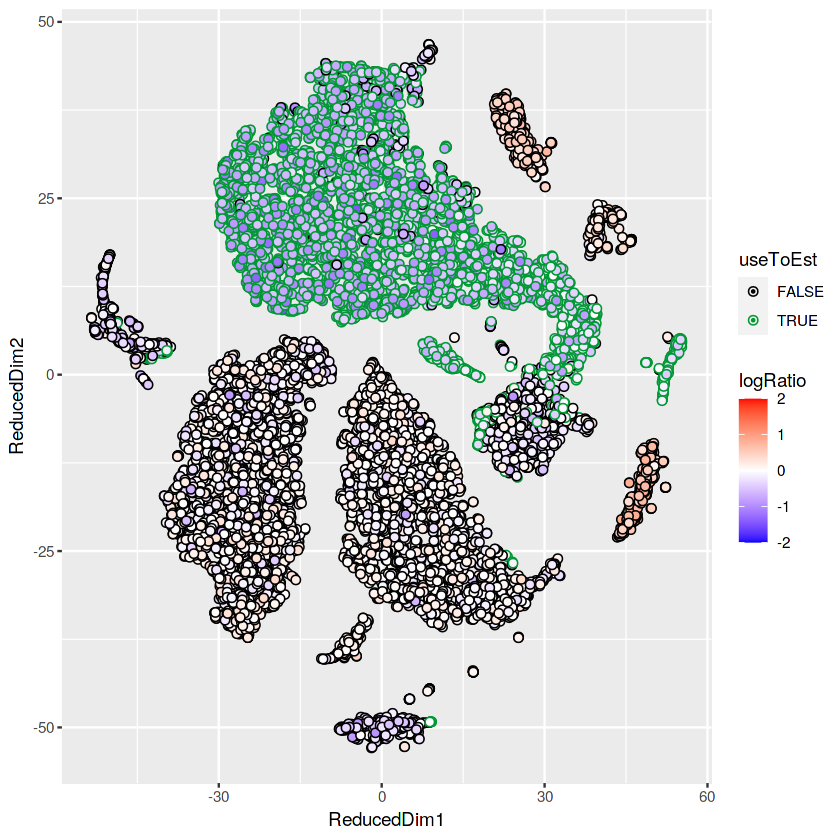

In [53]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes), 
    clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

In [54]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

In [55]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst)

Estimated global contamination fraction of 25.26%



In [56]:
head(sc1$metaData)

nUMIs RD1        RD2         rho       clusters rhoLow   
AAACCCAAGAGCCATG-1  3787 -42.985360   2.3373223 0.2526195 18       0.2499176
AAACCCAAGCCTCATA-1 10395  -5.539497 -24.0584991 0.2526195 1        0.2499176
AAACCCAAGCCTGTGC-1  5567  -9.277707   0.4823722 0.2526195 0        0.2499176
AAACCCAAGGGAGATA-1  2692 -44.486227   4.1368117 0.2526195 8        0.2499176
AAACCCACAACATCGT-1 15426  38.851399  21.9300833 0.2526195 10       0.2499176
AAACCCACAGTTGAAA-1  7103  14.413725  18.1299900 0.2526195 2        0.2499176
                   rhoHigh  
AAACCCAAGAGCCATG-1 0.2553407
AAACCCAAGCCTCATA-1 0.2553407
AAACCCAAGCCTGTGC-1 0.2553407
AAACCCAAGGGAGATA-1 0.2553407
AAACCCACAACATCGT-1 0.2553407
AAACCCACAGTTGAAA-1 0.2553407

In [57]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, 
    cellSpecificEstimates = TRUE)
quantile(sc1$metaData$rho)

ERROR: Error in calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, : unused argument (cellSpecificEstimates = TRUE)


In [ ]:
##Manual alternative
#sc = setContaminationFraction(sc, 0.1)

In [62]:
out = adjustCounts(sc1, clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))

Expanding counts from 19 clusters to 11403 cells.



In [63]:
library(Matrix)
cntSoggy = rowSums(sc1$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

SMILR AP005233.2 AP003396.1 AL163973.3    ONECUT1 AC009108.5 AC021549.1 
         1          1          1          1          1          1          1 
  RPL30P14    RNF11P2  LINC01834 
         1          1          1

In [64]:
tail(sort(rowSums(sc1$toc > out)/rowSums(sc1$toc > 0)), n = 20)

COL18A1    SLC19A1  LINC01694      PCBP3 AJ011931.2 AJ011932.1     COL6A1 
         1          1          1          1          1          1          1 
    COL6A2       FTCD    SPATC1L        LSS AP001469.1 MCM3AP-AS1     MCM3AP 
         1          1          1          1          1          1          1 
      YBEY   C21orf58       PCNT      DIP2A      S100B      PRMT2 
         1          1          1          1          1          1

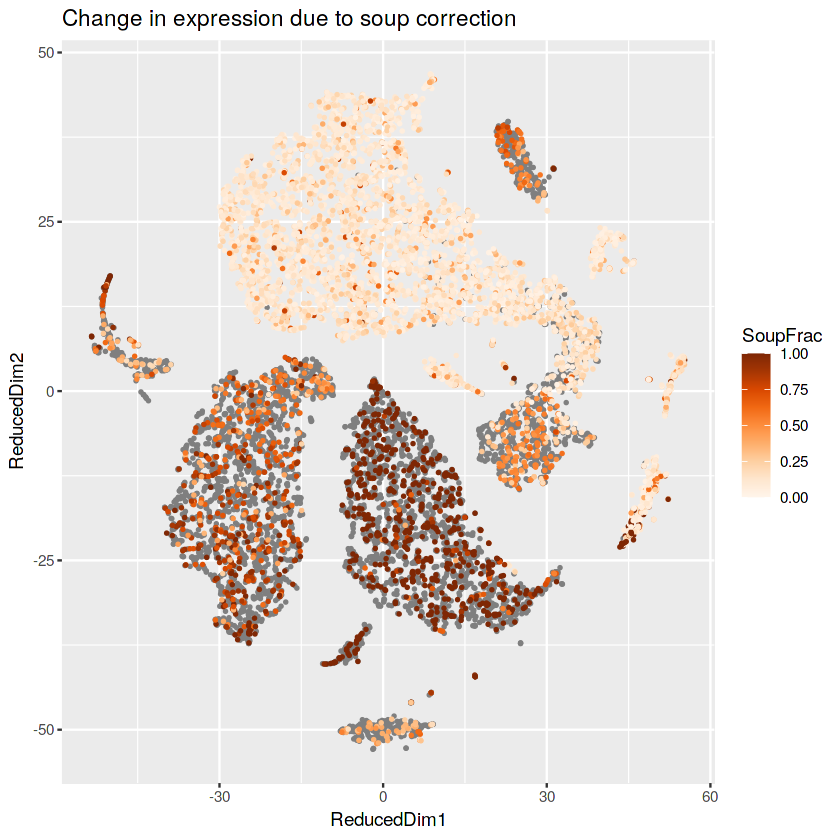

In [65]:
plotChangeMap(sc1, out, "RBFOX3")

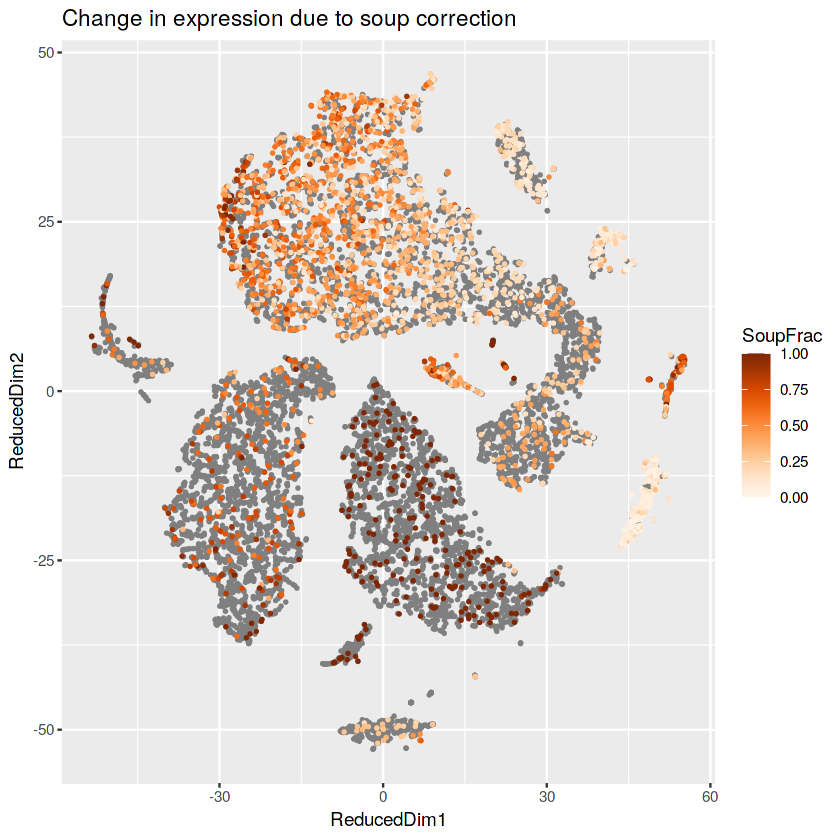

In [66]:
plotChangeMap(sc1, out, "GAD1")

In [67]:
DropletUtils:::write10xCounts("./strainedCounts_putamen_3", out)